## **IBK alternative KNN**

---



**Import relevant libraries and modules:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/AdultDataset.csv') #for this i saved the file on my google drive
data.head()

Mounted at /content/drive


age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

**Data Cleaning:** Drop all the rows with '?'


In [ ]:
data = data[data['workclass'] != '?']
data = data[data['education'] != '?']
data = data[data['marital-status'] != '?']
data = data[data['occupation'] != '?']
data = data[data['relationship'] != '?']
data = data[data['race'] != '?']
data = data[data['sex'] != '?']

data = data[data['capital-gain'] != '?']
data = data[data['capital-loss'] != '?']
data = data[data['hours-per-week'] != '?']
data = data[data['native-country'] != '?']
data = data[data['income'] != '?']
data

age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
5       34       Private  198693          10th              6   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male   
2      Married-civ-spouse    Protective-serv        Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
5           Never-married      Other-service  Not-in-family  White    Male   
...                   ...                ...            ...    ...     ...   
48837  Married-civ-spouse       Tech-support           Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
48839             Widowed       Adm-clerical      Unmarried  White  Female   
48840       Never-married       Adm-clerical      Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
5                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[45222 rows x 15 columns]

Quick data *correlation* visualisation

In [ ]:
cr = data.corr()
cr

<ipython-input-5-747701ff2238>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = data.corr()


age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.075792       0.037623      0.079683      0.059351   
fnlwgt         -0.075792  1.000000      -0.041993     -0.004110     -0.004349   
education-num   0.037623 -0.041993       1.000000      0.126907      0.081711   
capital-gain    0.079683 -0.004110       0.126907      1.000000     -0.032102   
capital-loss    0.059351 -0.004349       0.081711     -0.032102      1.000000   
hours-per-week  0.101992 -0.018679       0.146206      0.083880      0.054195   

                hours-per-week  
age                   0.101992  
fnlwgt               -0.018679  
education-num         0.146206  
capital-gain          0.083880  
capital-loss          0.054195  
hours-per-week        1.000000

<Axes: >

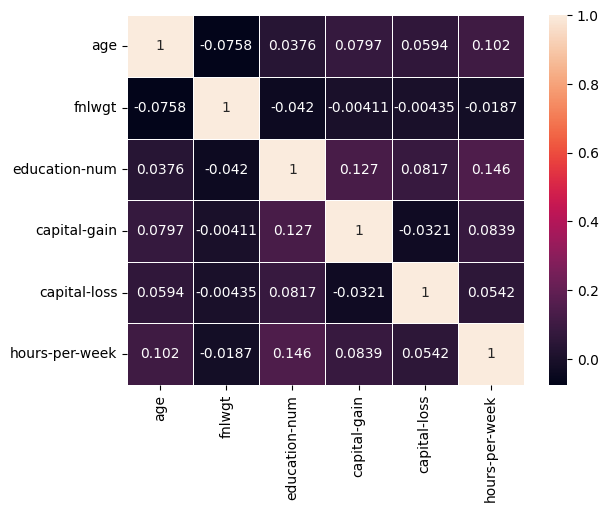

In [ ]:
sns.heatmap(cr, annot=True, fmt=".3g",
            linewidths = 0.55,
            linecolor = "white")

Create copy to keep the original dataset for the rest of classifiers unaltered and factorize data to be usable for KNN

In [ ]:
KNN_df = data.copy()
KNN_df['workclass'] = pd.factorize(KNN_df['workclass'])[0]
KNN_df['education'] = pd.factorize(KNN_df['education'])[0]
KNN_df['marital-status'] = pd.factorize(KNN_df['marital-status'])[0]
KNN_df['occupation'] = pd.factorize(KNN_df['occupation'])[0]
KNN_df['relationship'] = pd.factorize(KNN_df['relationship'])[0]
KNN_df['race'] = pd.factorize(KNN_df['race'])[0]
KNN_df['sex'] = pd.factorize(KNN_df['sex'])[0]
KNN_df['native-country'] = pd.factorize(KNN_df['native-country'])[0]

In [ ]:
KNN_df

age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country income  
0                  40               0  <=50K  
1                  50               0  <=50K  
2                  40               0   >50K  
3                  40               0   >50K  
5                  30               0  <=50K  
...               ...             ...    ...  
48837              38               0  <=50K  
48838              40               0   >50K  
48839              40               0  <=50K  
48840              20               0  <=50K  
48841              40               0   >50K  

[45222 rows x 15 columns]

Create copy

In [ ]:
def score(x):
  if x == '<=50K': # earning >50k as 0
    return 0
  elif x == '>50K': # earning <=50k as 1
    return 1;

KNN_df['income'] = KNN_df['income'].apply(score)
KNN_df

age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country  income  
0                  40               0       0  
1                  50               0       0  
2                  40               0       1  
3                  40               0       1  
5                  30               0       0  
...               ...             ...     ...  
48837              38               0       0  
48838              40               0       1  
48839              40               0       0  
48840              20               0       0  
48841              40               0       1  

[45222 rows x 15 columns]

**Define the features and the target:**

In [ ]:
target = KNN_df['income']
features = KNN_df.drop('income', axis=1)

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

**Split the features and target:**

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

**Fitting and evaluating the model:**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
target_pred = knn.predict(features_test)
target_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
acc = accuracy_score(target_test, target_pred)
acc

0.8143381539958428

In [ ]:
f1_score(target_test, target_pred, average='weighted')

0.812190157920665

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, features_train, target_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

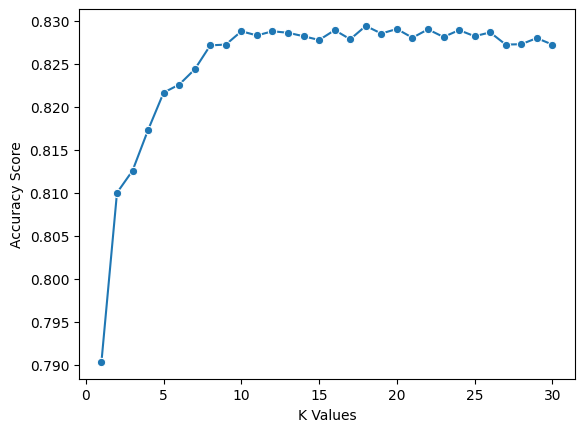

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=18)

In [ ]:
target_pred = knn.predict(features_test)
target_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
#print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)

Accuracy: 0.831188359647959
Precision: 0.7803574084669045
Precision: 0.831188359647959
Precision: 0.822839171623894
Recall: 0.7382344153169776
Recall: 0.831188359647959
Recall: 0.831188359647959
RMSE: 0.4108669375260573


In [ ]:
cm = confusion_matrix(y_true = target_test, y_pred = target_pred, normalize='all')
cm

array([[0.69461766, 0.0594401 ],
       [0.10937154, 0.1365707 ]])

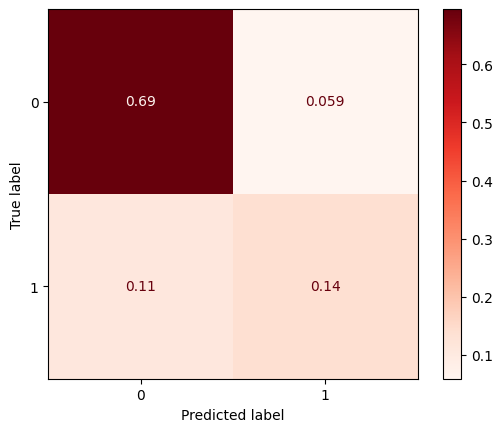

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.89165176, 0.61803262])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7548421935037741

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.831188359647959

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8243572595071454

# **Random Forest**

In [ ]:
rf_data = KNN_df.copy()

In [ ]:
rf_data

age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country  income  
0                  40               0       0  
1                  50               0       0  
2                  40               0       1  
3                  40               0       1  
5                  30               0       0  
...               ...             ...     ...  
48837              38               0       0  
48838              40               0       1  
48839              40               0       0  
48840              20               0       0  
48841              40               0       1  

[45222 rows x 15 columns]

In [ ]:
target = rf_data['income']
features = rf_data.drop('income', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

In [ ]:
RDF_2 = RandomForestClassifier(n_estimators=2)
RDF_2 = RDF_2.fit(features_train, target_train)

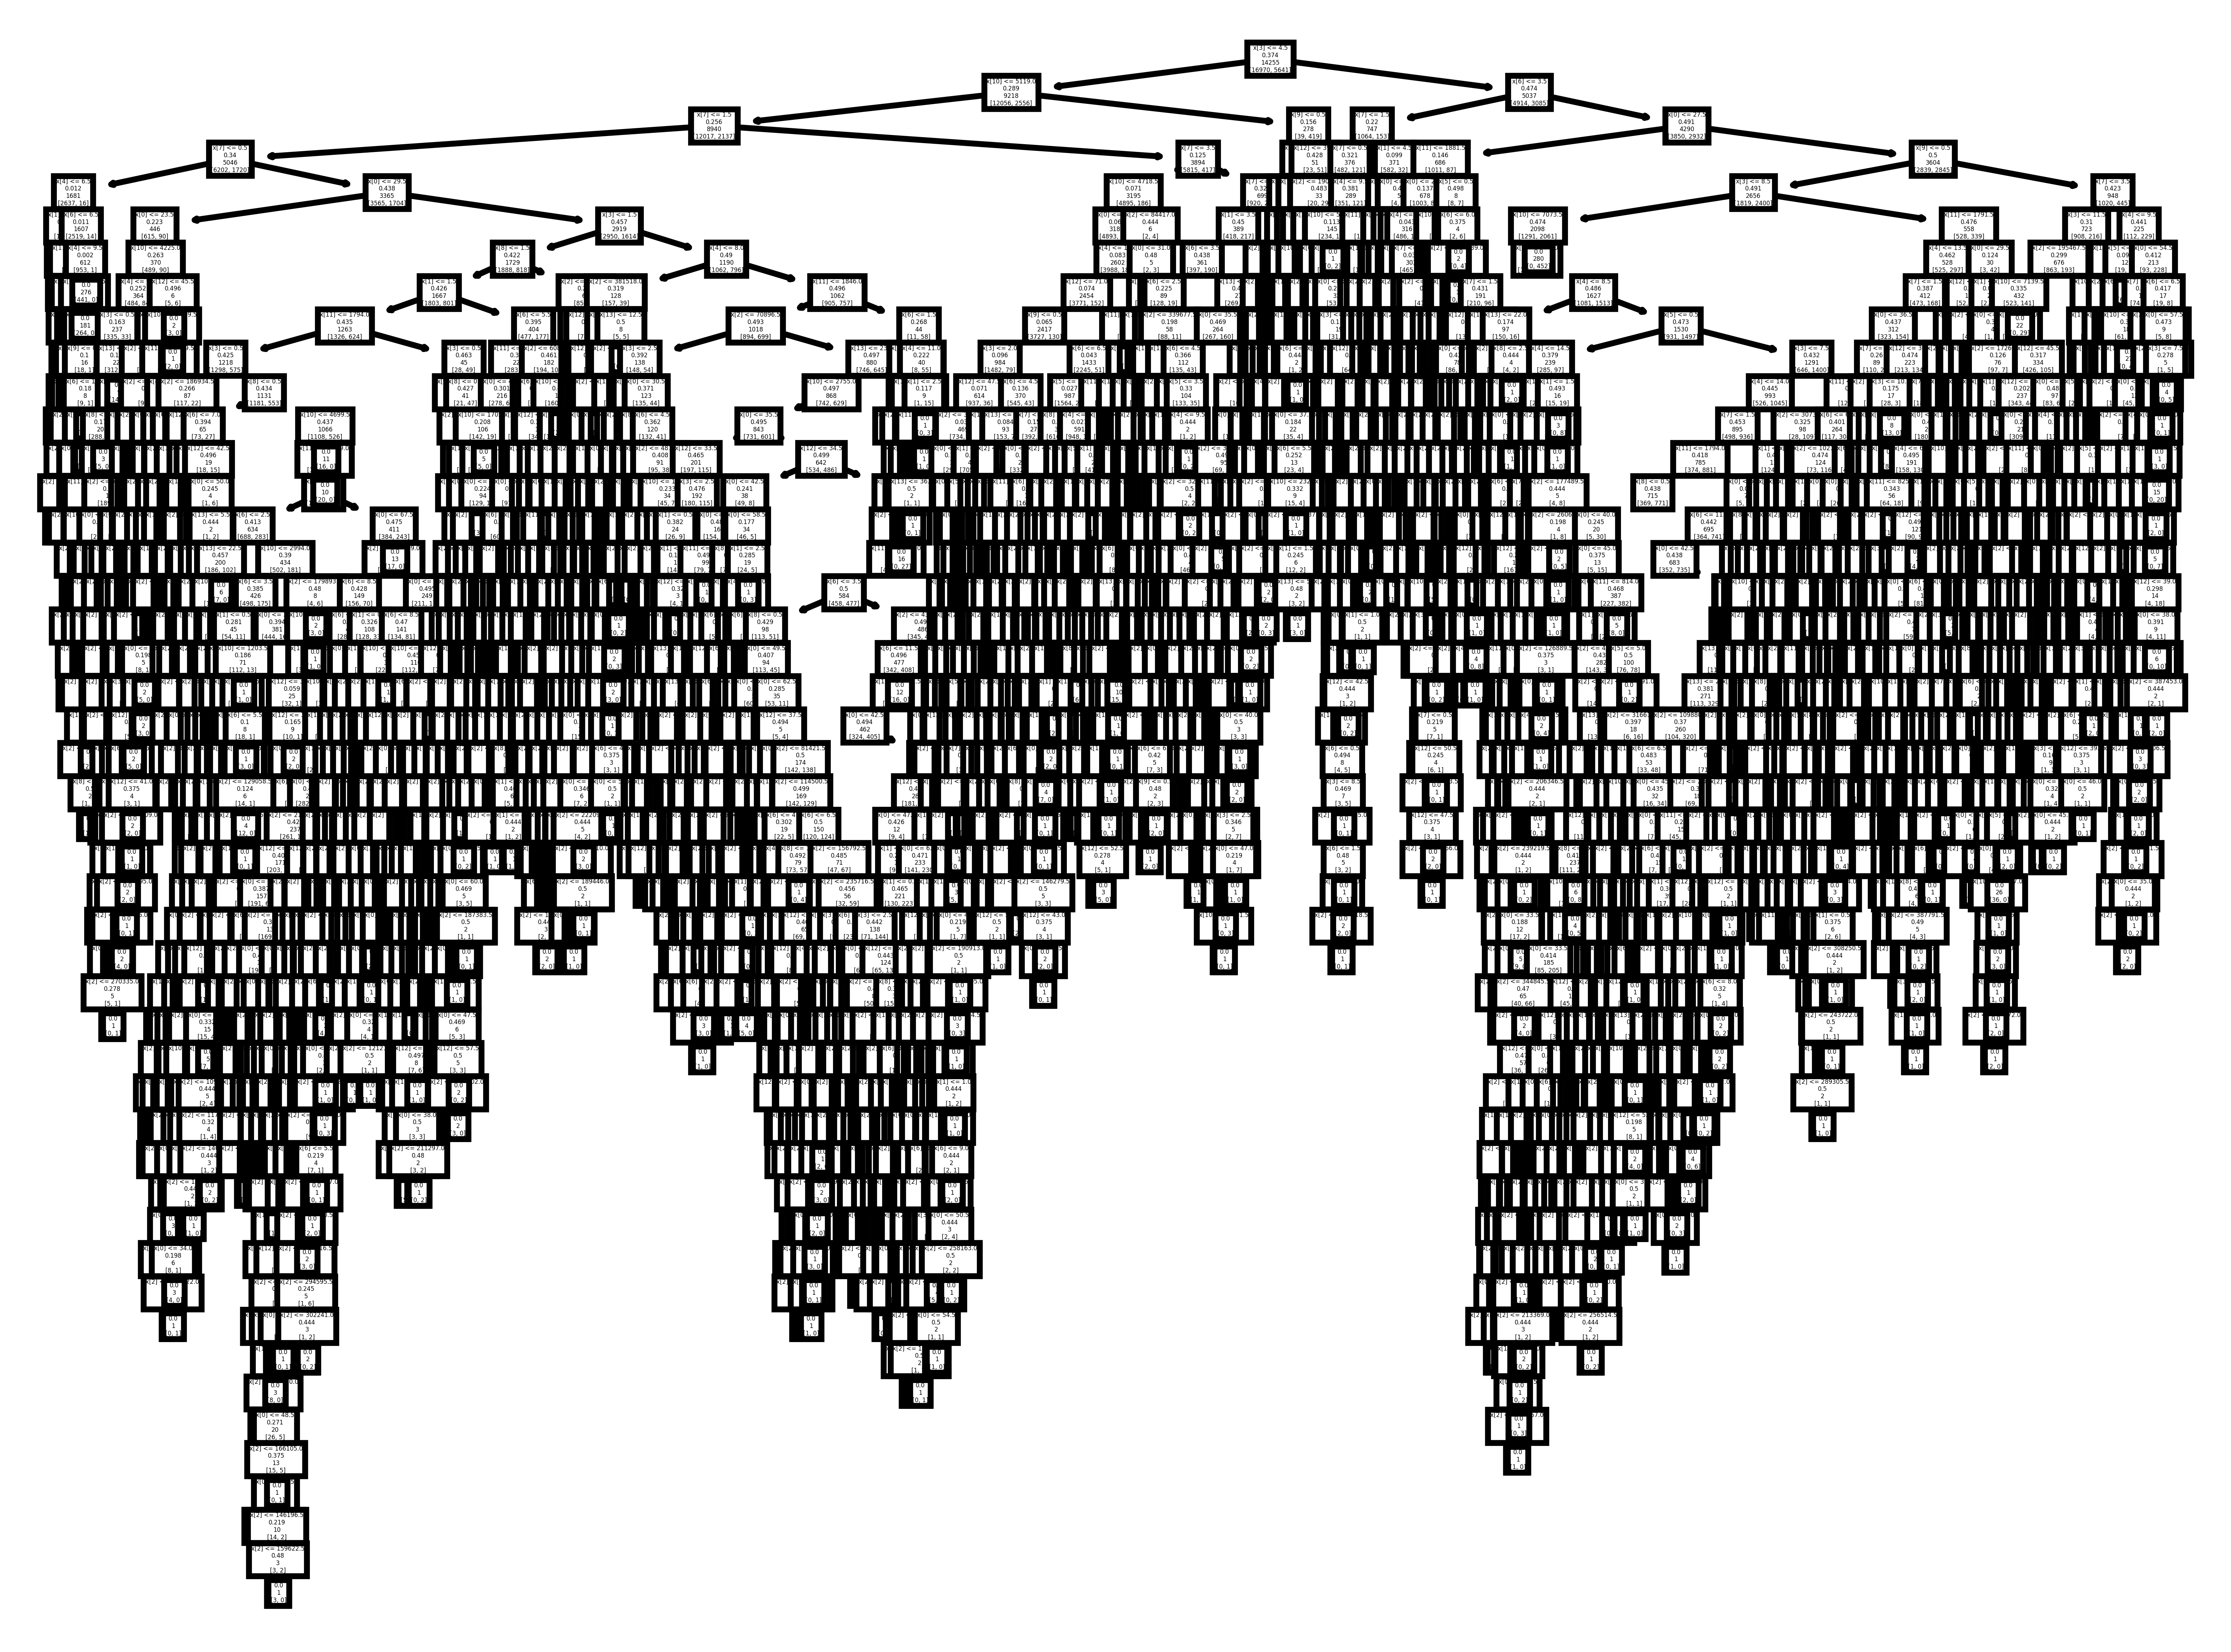

In [ ]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_2.estimators_[0], label=None);

In [ ]:
target_pred = RDF_2.predict(features_test)
target_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8257927557383574
Precision: 0.791821568818655
Precision: 0.8257927557383574
Precision: 0.8164869519577026
Recall: 0.7038843234790861
Recall: 0.8257927557383574
Recall: 0.8257927557383574
RMSE: 0.4173814134118128
[[16075   900]
 [ 3039  2597]]


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.71093715, 0.03980364],
       [0.13440361, 0.1148556 ]])

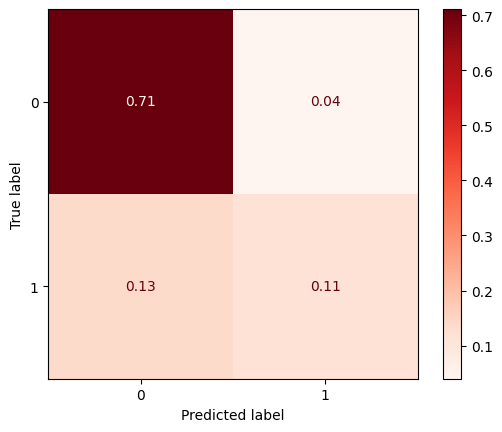

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.89085317, 0.56870689])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7297800278340919

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8257927557383574

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8105552409003084

N-5

In [ ]:
RDF_5 = RandomForestClassifier(n_estimators=5)
RDF_5 = RDF_5.fit(features_train, target_train)

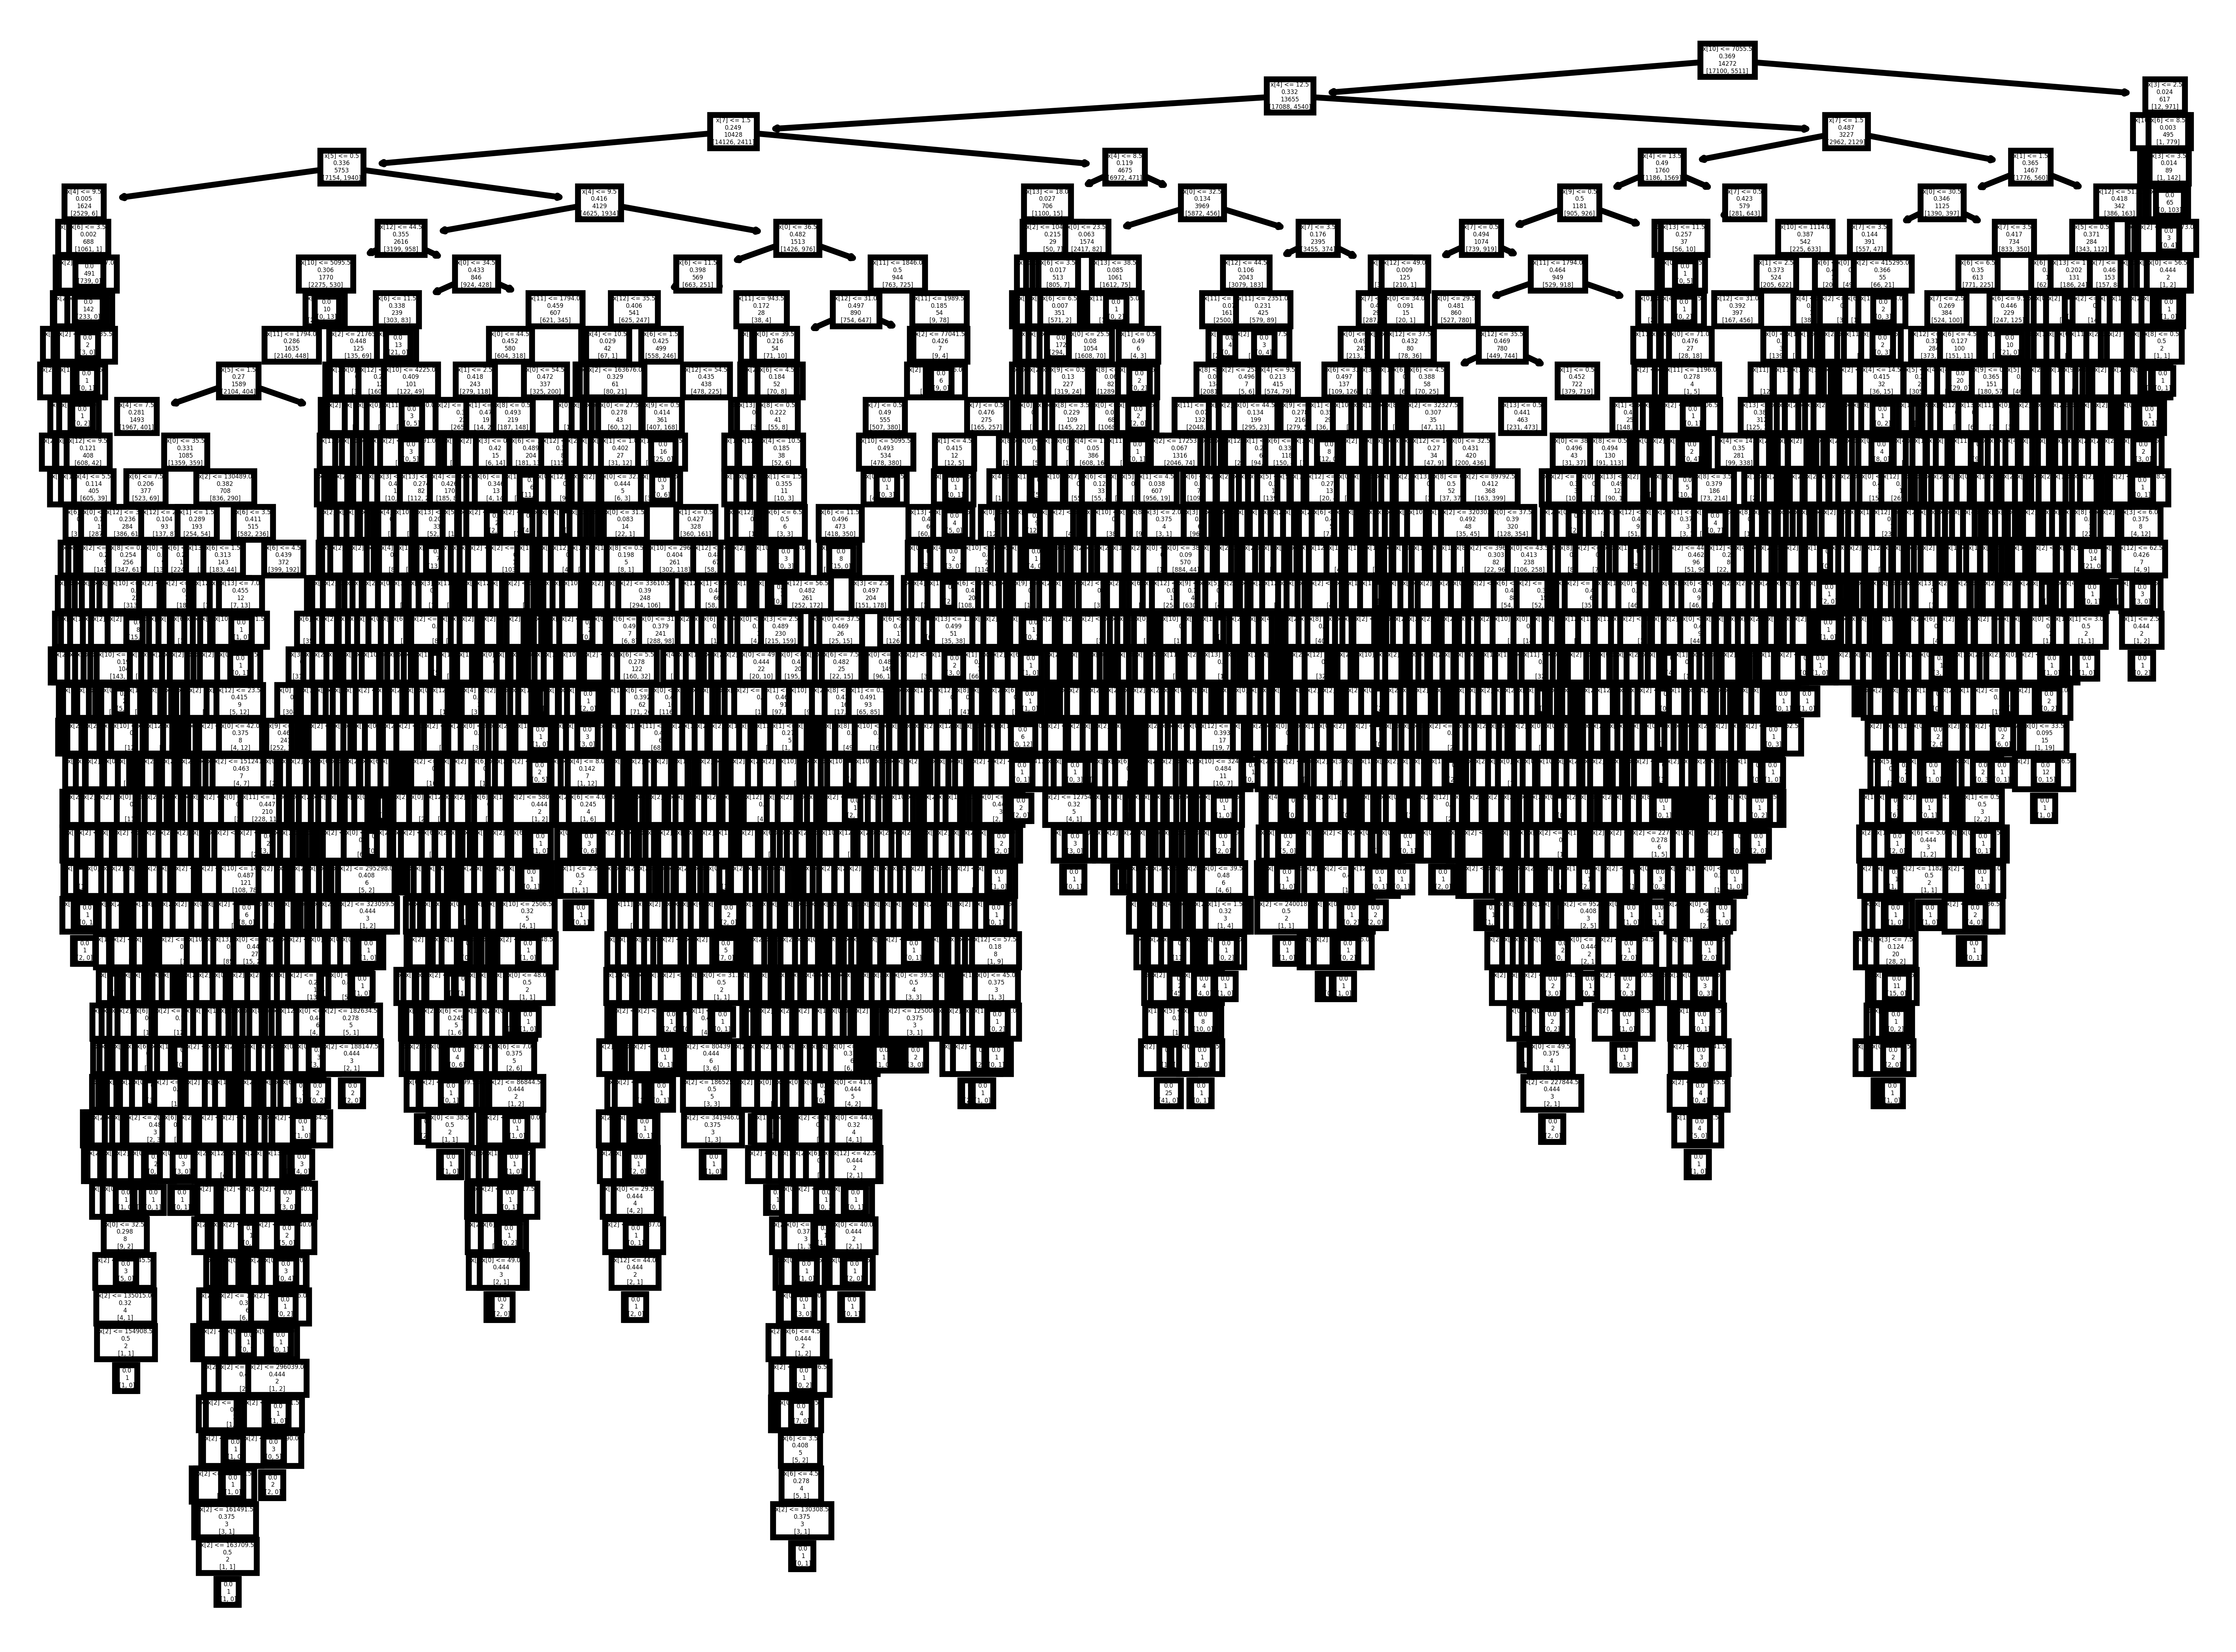

In [ ]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_5.estimators_[0], label=None);

In [ ]:
target_pred = RDF_5.predict(features_test)
target_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8349033656185043
Precision: 0.7831709945640464
Precision: 0.8349033656185043
Precision: 0.8296485601599973
Recall: 0.7604418627986926
Recall: 0.8349033656185043
Recall: 0.8349033656185043
RMSE: 0.40632085152191705
[[15429  1546]
 [ 2187  3449]]


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.68236699, 0.0683738 ],
       [0.09672283, 0.15253638]])

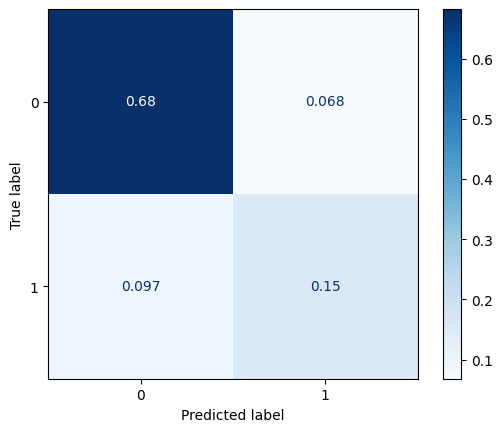

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

N-20

In [ ]:
RDF_20 = RandomForestClassifier(n_estimators=20)
RDF_20 = RDF_20.fit(features_train, target_train)

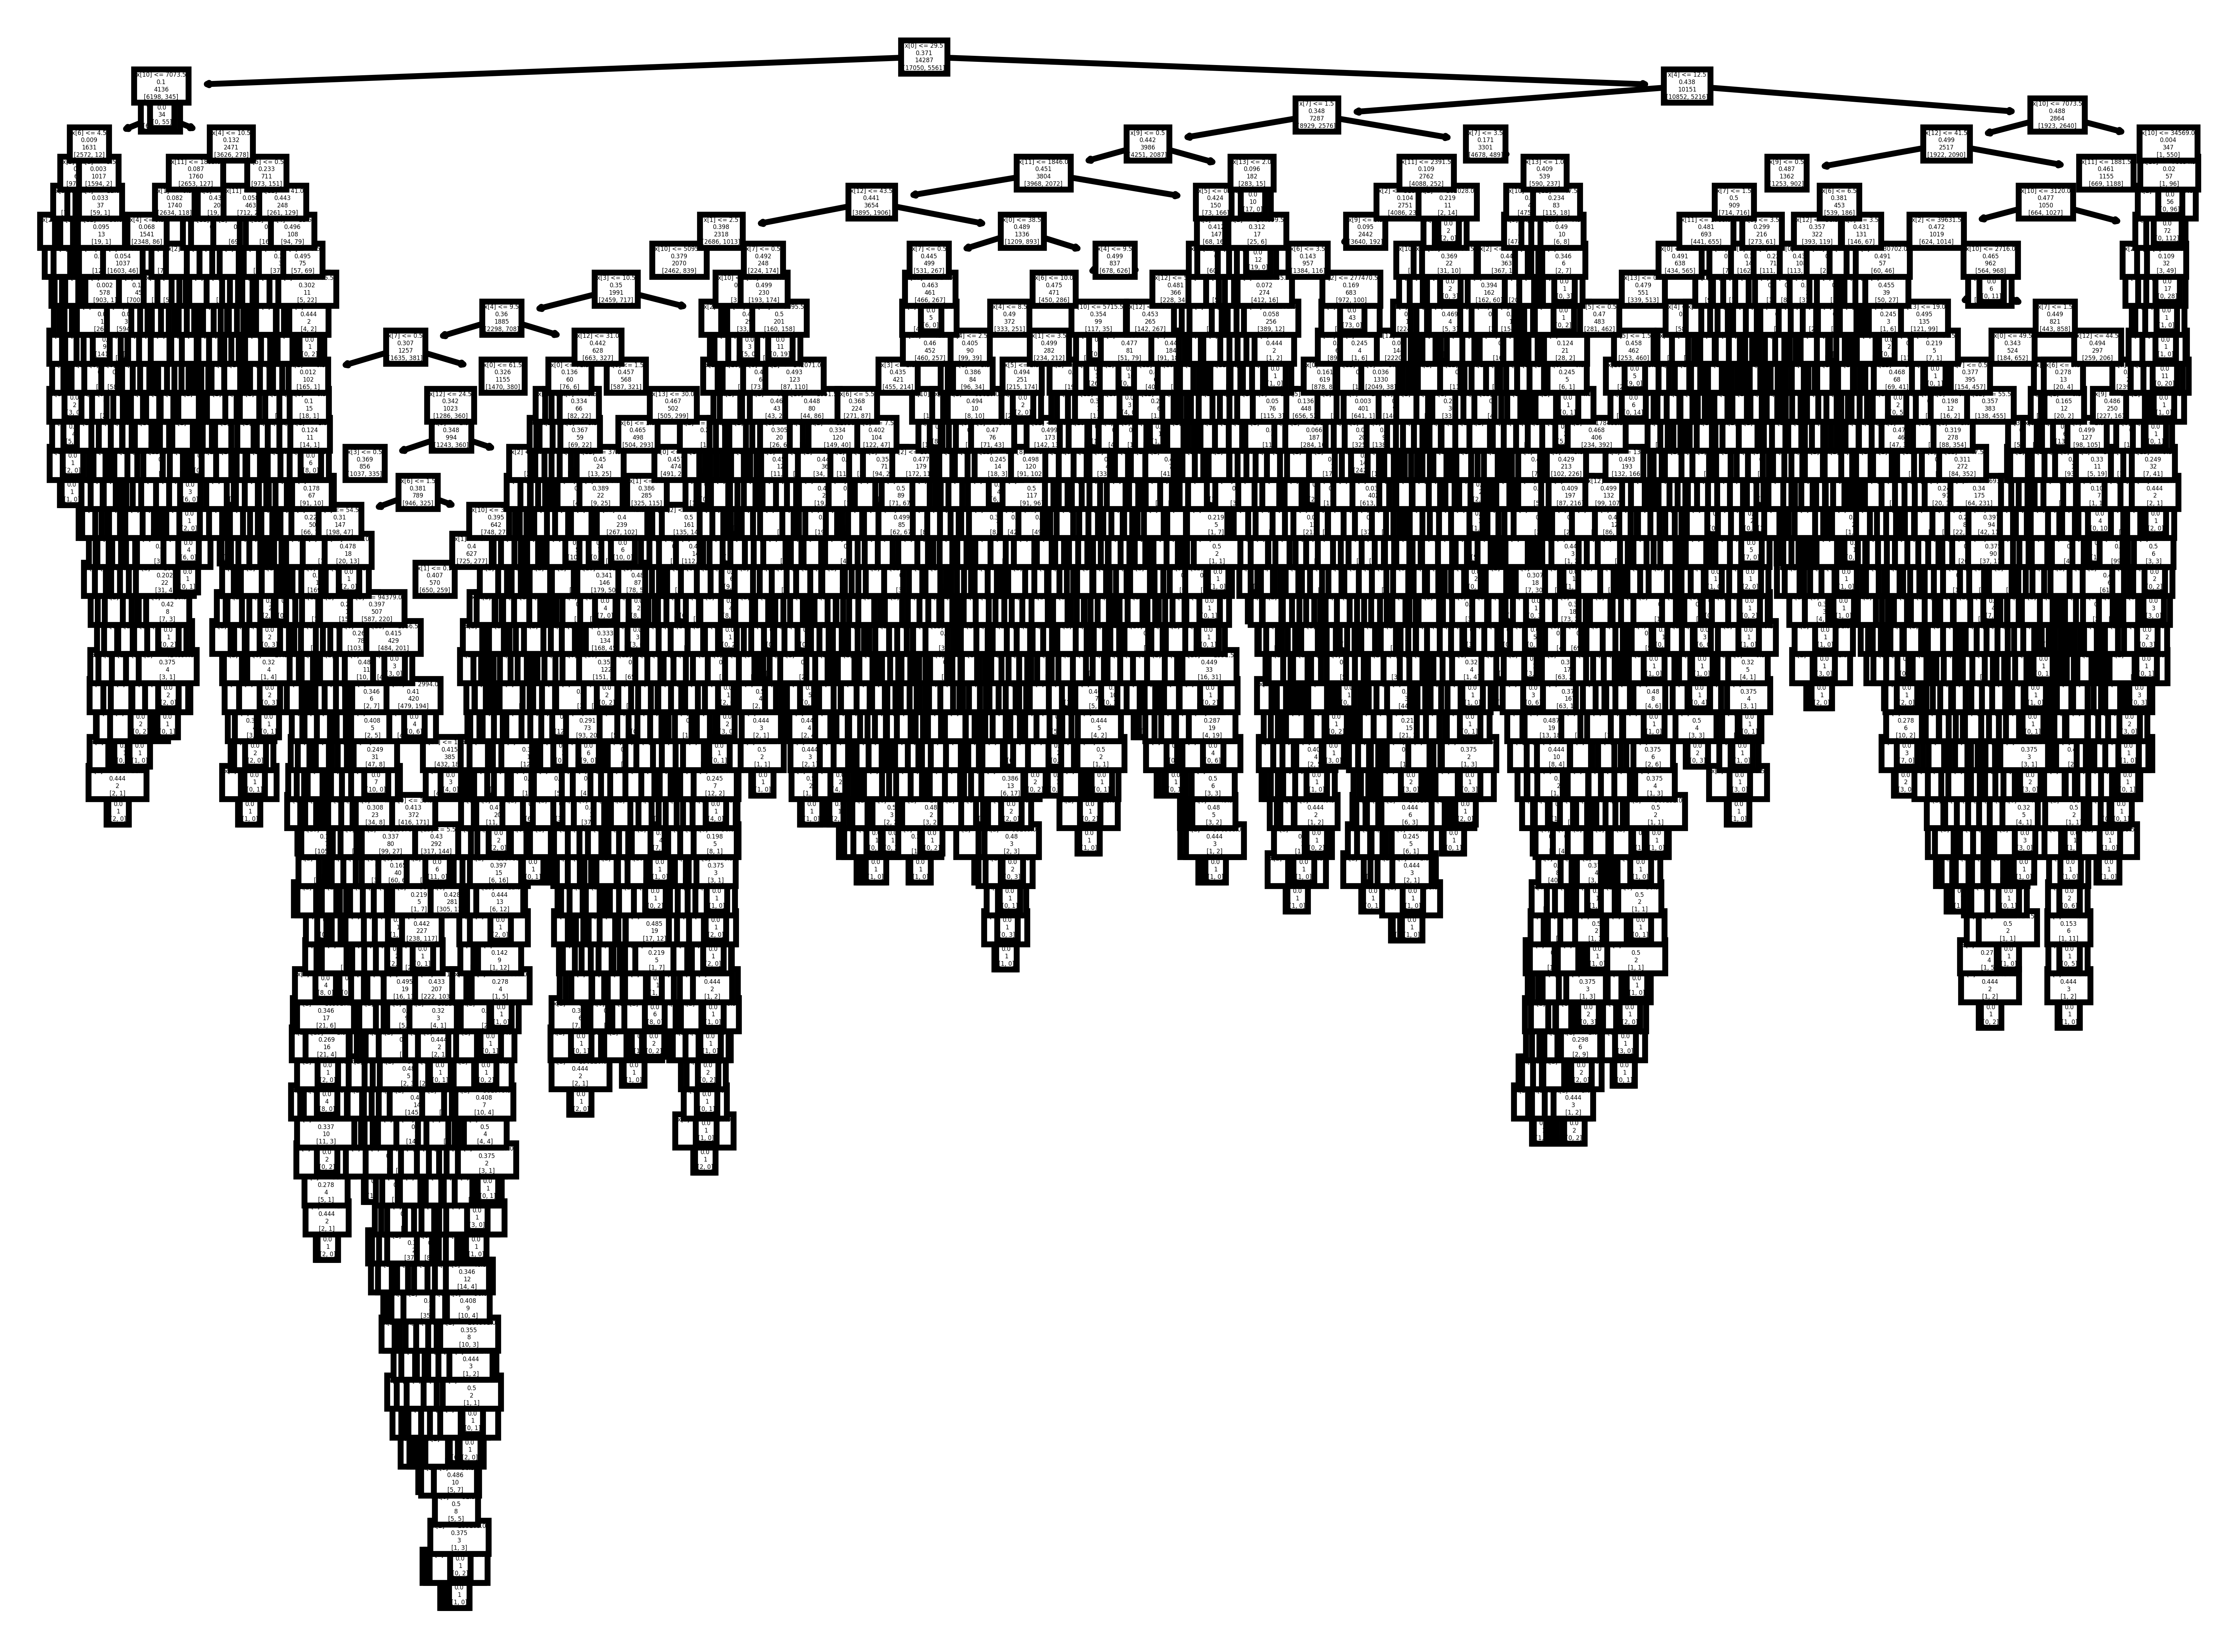

In [ ]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_20.estimators_[0], label=None);

In [ ]:
target_pred = RDF_20.predict(features_test)
target_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8489673167927115
Precision: 0.8082573724767643
Precision: 0.8489673167927115
Precision: 0.8428997783753402
Recall: 0.7688011531172946
Recall: 0.8489673167927115
Recall: 0.8489673167927115
RMSE: 0.38862923617155787
[[15764  1211]
 [ 2204  3432]]


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.69718279, 0.053558  ],
       [0.09747468, 0.15178453]])

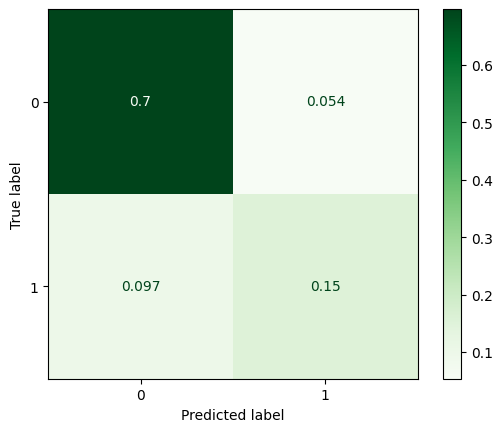

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Greens)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.90226941, 0.66776924])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7850193242175226

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8489673167927115

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8438180825543753

N-25

In [ ]:
RDF_25 = RandomForestClassifier(n_estimators=20)
RDF_25 = RDF_25.fit(features_train, target_train)

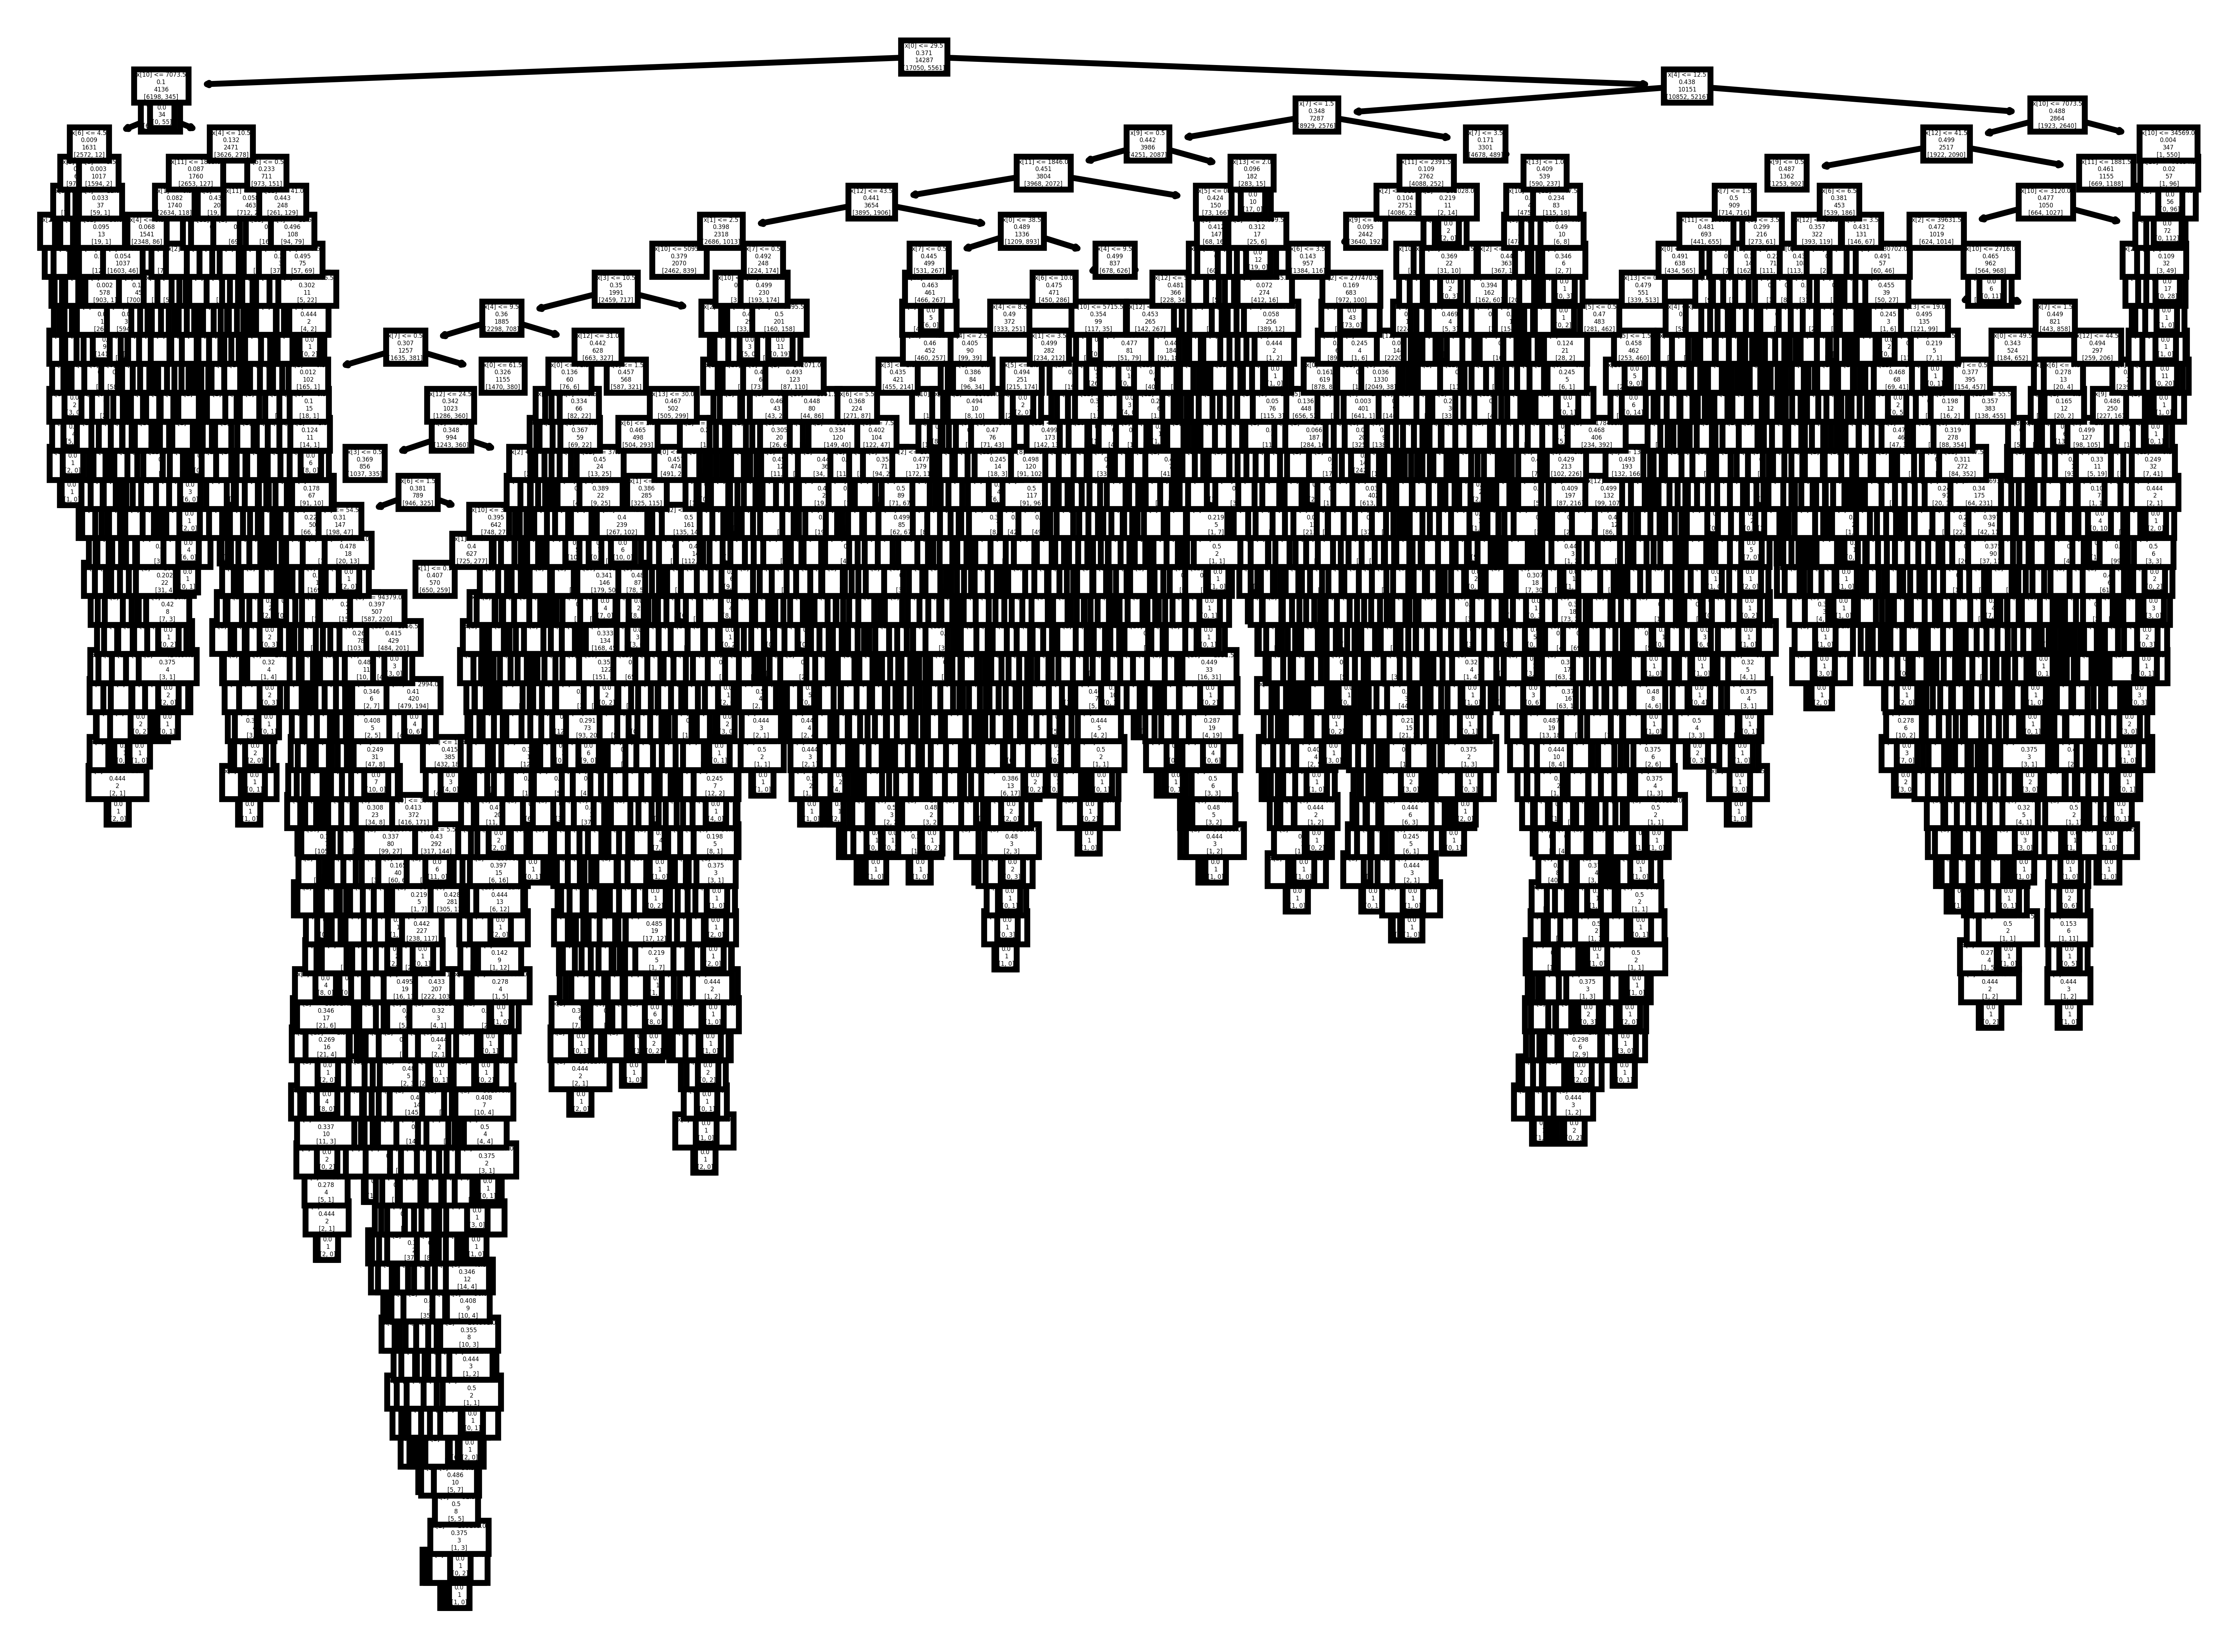

In [ ]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_20.estimators_[0], label=None);

In [ ]:
target_pred = RDF_25.predict(features_test)
target_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)

Accuracy: 0.8516651187475123
Precision: 0.8134186235302181
Precision: 0.8516651187475123
Precision: 0.845659870223319
Recall: 0.7705386527383922
Recall: 0.8516651187475123
Recall: 0.8516651187475123
RMSE: 0.3851426764881915


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.69992482, 0.05081597],
       [0.09751891, 0.1517403 ]])

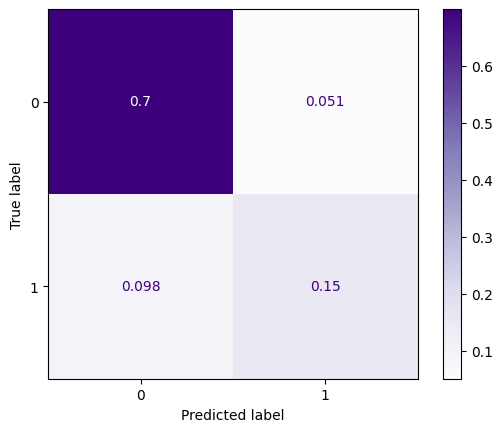

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Purples)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.90418785, 0.67169146])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7879396589402214

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8516651187475123

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8462359871979762

# **J48 - Decision Tree**

Create the Decision Tree classifier object, train it and predict the response using the defined features and target.

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


N-2

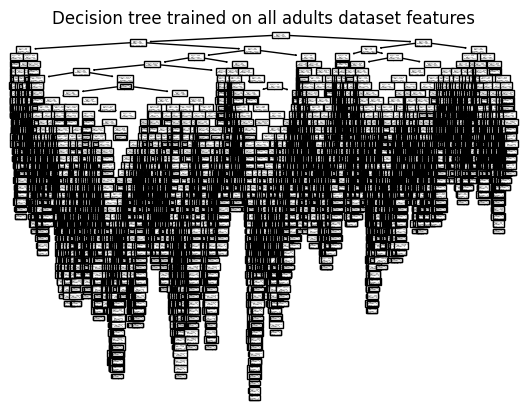

In [ ]:
DecTree_2 = tree.DecisionTreeClassifier(max_features = 2)
DecTree = DecTree_2.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_2)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_2.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.7980628897439299
Precision: 0.7303444386101257
Precision: 0.7980628897439299
Precision: 0.7986897450103221
Recall: 0.731757557925016
Recall: 0.7980628897439299
Recall: 0.7980628897439299
RMSE: 0.4493741317166244
[[14666  2309]
 [ 2257  3379]]


Evaluate the accuracy as to how many times was the model correct.

In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.7980628897439299


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.64862235, 0.10211844],
       [0.09981867, 0.14944054]])

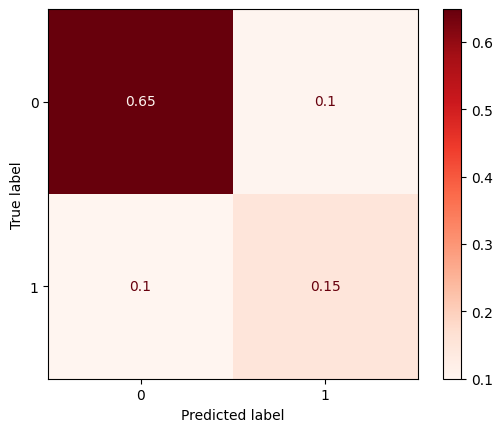

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.86530179, 0.59678559])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7310436879237459

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.7980628897439299

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.7983716519034632

N-5

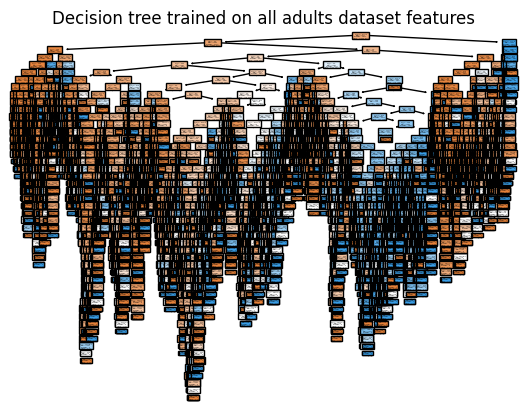

In [ ]:
DecTree_5 = tree.DecisionTreeClassifier(max_features = 5)
DecTree = DecTree_5.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_5, filled=True)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_5.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8057140329927911
Precision: 0.7407811291243336
Precision: 0.8057140329927911
Precision: 0.8082240344064111
Recall: 0.7466905000569659
Recall: 0.8057140329927911
Recall: 0.8057140329927911
RMSE: 0.44077881869165275
[[14673  2302]
 [ 2091  3545]]


In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.8057140329927911


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.64893194, 0.10180885],
       [0.09247711, 0.1567821 ]])

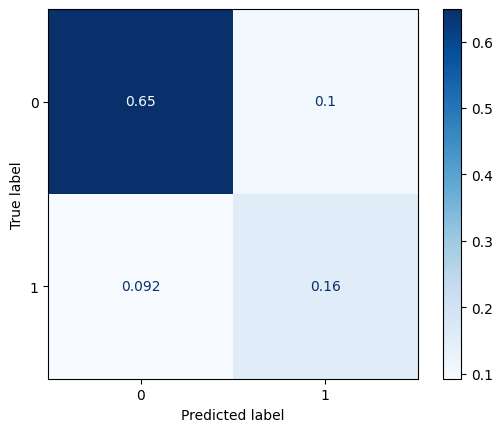

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.8697946 , 0.61743447])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.74361453403295

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8057140329927911

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8068915127088699

N-20

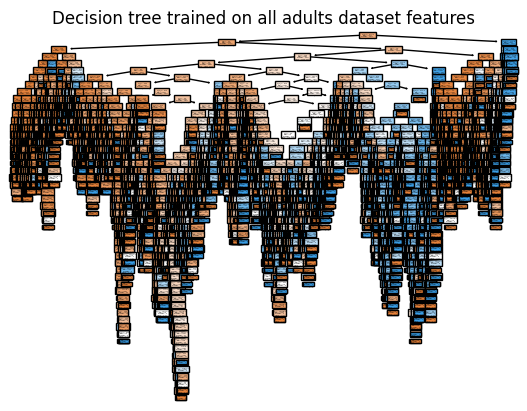

In [ ]:
DecTree_20 = tree.DecisionTreeClassifier(max_features = 20)
DecTree = DecTree_20.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_20, filled=True)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_20.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8089425500862412
Precision: 0.7448234487621946
Precision: 0.8089425500862412
Precision: 0.8099301461664541
Recall: 0.7472999526502779
Recall: 0.8089425500862412
Recall: 0.8089425500862412
RMSE: 0.43710118955884664
[[14772  2203]
 [ 2117  3519]]


In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.8089425500862412


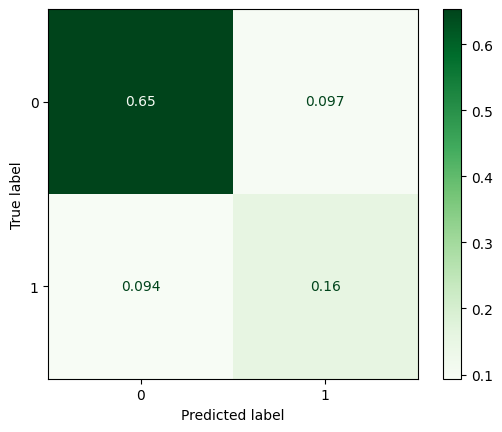

In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Greens)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.8724309 , 0.61965135])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7460411235695088

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8089425500862412

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8094232683551863

N-25

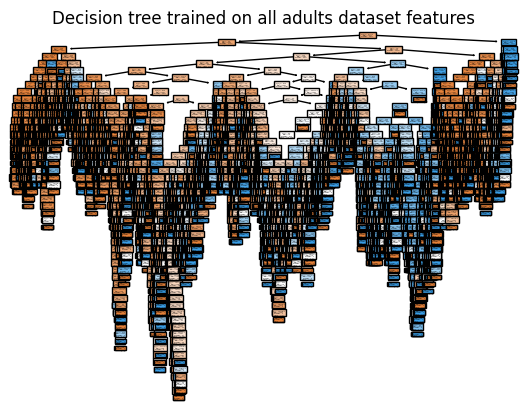

In [ ]:
DecTree_25 = tree.DecisionTreeClassifier(max_features = 25)
DecTree = DecTree_25.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_25, filled=True)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_25.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8062005218698863
Precision: 0.7411446592681152
Precision: 0.8062005218698863
Precision: 0.8067560108683537
Recall: 0.7425107216285796
Recall: 0.8062005218698863
Recall: 0.8062005218698863
RMSE: 0.4402266213328241
[[14760  2215]
 [ 2167  3469]]


In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.8062005218698863


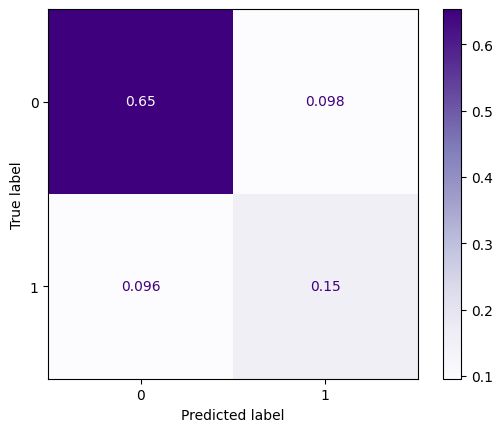

In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Purples)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.87074509, 0.61289753])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7418213076435445

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8062005218698863

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8064742090794216